In [52]:
import pandas as pd
import kagglehub as kh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


**Binary Logistic Regression:** 

In [53]:
path = kh.dataset_download("rakeshrau/social-network-ads")

dataset = pd.read_csv(f"{path}/Social_Network_Ads.csv")

dataset.drop(columns=["User ID","Gender","EstimatedSalary"],axis=1,inplace=True)
dataset.tail()

,Age,Purchased
395,46,1
396,51,1
397,50,1
398,36,0
399,49,1


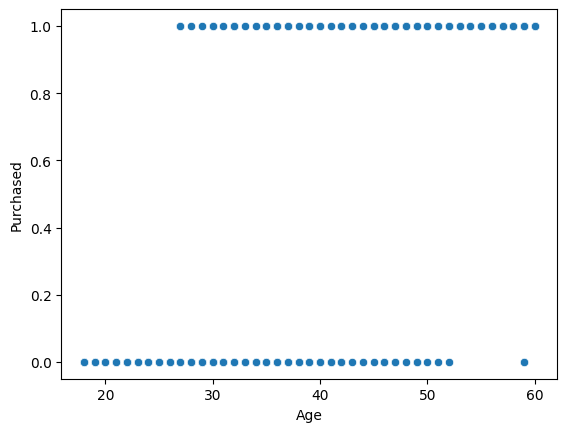

In [54]:
sns.scatterplot(x= "Age",y = "Purchased",data=dataset)
plt.show()

In [55]:
x= dataset[["Age"]]
y= dataset["Purchased"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [56]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
print(lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100)


82.1875 91.25


In [58]:
test = lr.predict([[50]])
test

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

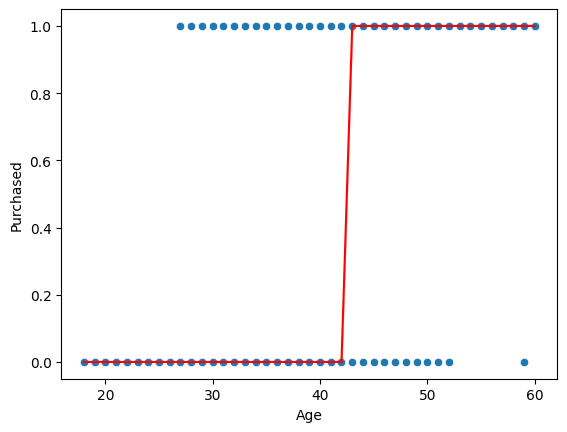

In [59]:
sns.scatterplot(x= "Age",y = "Purchased",data=dataset)
sns.lineplot(x="Age",y= lr.predict(x),data=dataset,c="r")
plt.show()

**Multinomial Logistic Regression:** 

In [60]:
from  mlxtend.plotting import plot_decision_regions

In [61]:
path = kh.dataset_download("somya2115/placement-csv")
database = pd.read_csv(f"{path}/placement.csv")
database = database.drop("Unnamed: 0", axis=1)
database.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


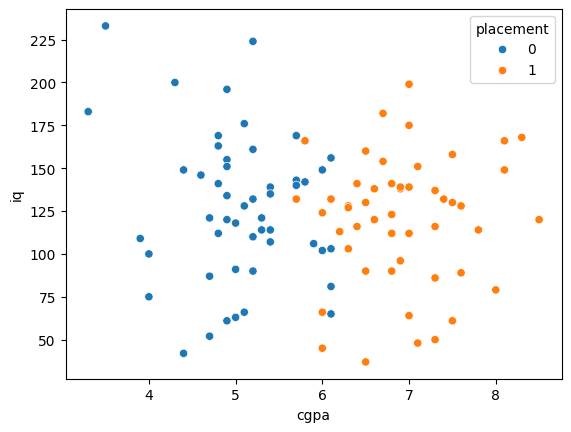

In [62]:
sns.scatterplot(x="cgpa",y="iq",data=database,hue="placement")
plt.show()

In [63]:
a= database.drop("placement",axis =1)
b= database["placement"]

a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=.2,random_state=42)


In [64]:
lr.fit(a_train,b_train)
lr.score(a_test,b_test)

0.85

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


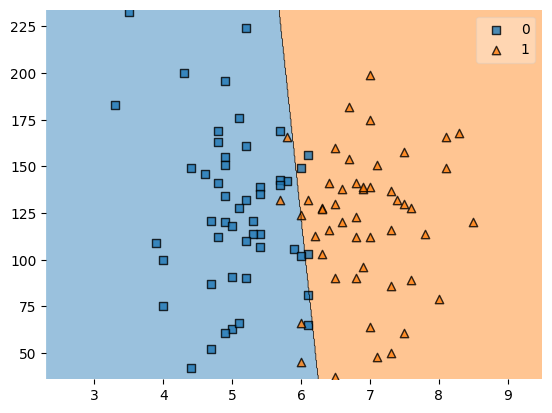

In [65]:
plot_decision_regions(a.to_numpy(),b.to_numpy(),clf=lr)
plt.show()


***using polynominal feature***


In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
sample_data = pd.DataFrame({
    'cgpa': np.round(np.random.uniform(5.0, 9.0, 200), 1),
    'iq': np.round(np.random.uniform(100, 150, 200), 1),
    'placement': np.random.randint(0, 2, 200)
})
sample_data.head()

,cgpa,iq,placement
0,6.2,105.2,1
1,6.8,105.5,0
2,6.9,132.7,1
3,5.2,114.1,1
4,5.8,124.4,0


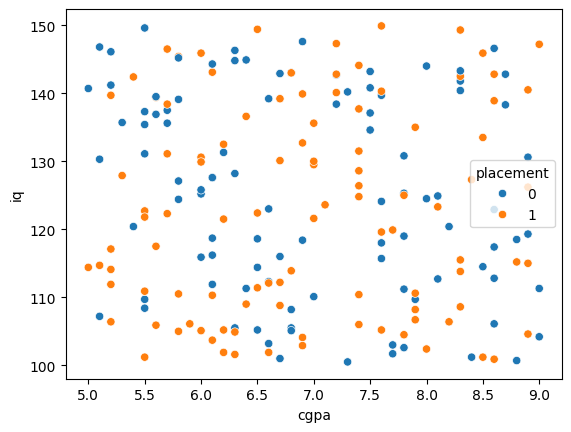

In [68]:
sns.scatterplot(x="cgpa",y="iq",data=sample_data,hue="placement")
plt.show()

In [69]:
p= sample_data.drop("placement",axis =1)
q= sample_data["placement"]

pf = PolynomialFeatures(degree=2)

p=pd.DataFrame(pf.fit_transform(p))

In [70]:
p_train,p_test,q_train,q_test = train_test_split(p,q,test_size=.2,random_state=42)

lr.fit(p_train,q_train)
lr.score(p_test,q_test)*100

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


62.5

# Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for classification problems. It predicts the probability that a given input belongs to a particular category.

---

## Key Concepts

- **Purpose:** Used for binary and multiclass classification tasks.
- **Output:** Predicts probabilities between 0 and 1 using the sigmoid function.
- **Decision Boundary:** Classifies inputs based on a threshold (commonly 0.5).

---
### Types of Logistic Regression

- **Binary Logistic Regression:**  
    Used when the target variable has two possible outcomes (e.g., yes/no, 0/1).

- **Multinomial Logistic Regression:**  
    Used when the target variable has more than two categories (e.g., classifying types of fruits).

- **Ordinal Logistic Regression:**  
    Used when the target variable is categorical with ordered levels (e.g., rating scales: low, medium, high).
## How It Works

1. **Linear Combination:**  
    Computes a weighted sum of input features:
    \[
    z = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
    \]

2. **Sigmoid Activation:**  
    Applies the sigmoid function to map the result to a probability:
    \[
    \sigma(z) = \frac{1}{1 + e^{-z}}
    \]

3. **Prediction:**  
    - If probability > 0.5, class = 1  
    - If probability ≤ 0.5, class = 0

---

## Advantages

- Simple and easy to implement
- Works well with linearly separable data
- Outputs calibrated probabilities
- Less prone to overfitting with regularization

---

## Limitations

- Assumes linear relationship between input features and the log-odds
- Not suitable for complex, non-linear problems
- Sensitive to outliers

---

## Applications

- Spam detection
- Medical diagnosis (e.g., disease prediction)
- Credit scoring
- Marketing (e.g., predicting customer churn)

---

## Visualization

The logistic regression model fits an S-shaped curve (sigmoid) to the data, separating the classes based on the probability threshold.

---

## References

- [Scikit-learn: Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Wikipedia: Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)